## Data Analysis of Bike Share Dataset

---

Name : I Made Dwi Andika Saputra



### Data Content

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Data Gathering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', None)

In [2]:
hour_df = pd.read_csv('/content/drive/MyDrive/Dataset/Bike Share Dataset/hour.csv')
day_df = pd.read_csv('/content/drive/MyDrive/Dataset/Bike Share Dataset/day.csv')

In [3]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Accessing Data

In [5]:
hour_df.shape

(17379, 17)

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
hour_df.duplicated().sum()

0

In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### 1. Rename the columns

In [10]:
hour_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
hour_df.rename(columns = {
    'instant' : 'rec_in',
    'dteday' : 'date',
    'yr' : 'year',
    'hr' : 'hour',
    'mnth' : 'month',
    'temp' : 'temperature',
    'hum' : 'humidity',
    'cnt' : 'total_count'
}, inplace=True)

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rec_in       17379 non-null  int64  
 1   date         17379 non-null  object 
 2   season       17379 non-null  int64  
 3   year         17379 non-null  int64  
 4   month        17379 non-null  int64  
 5   hour         17379 non-null  int64  
 6   holiday      17379 non-null  int64  
 7   weekday      17379 non-null  int64  
 8   workingday   17379 non-null  int64  
 9   weathersit   17379 non-null  int64  
 10  temperature  17379 non-null  float64
 11  atemp        17379 non-null  float64
 12  humidity     17379 non-null  float64
 13  windspeed    17379 non-null  float64
 14  casual       17379 non-null  int64  
 15  registered   17379 non-null  int64  
 16  total_count  17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### 2. Change dtype

In [12]:
# change dtype in date column to datetime
hour_df['date'] = pd.to_datetime(hour_df['date'])

# change dtype in season - weathersit column to category
cat_columns = ['season', 'year', 'hour', 'holiday', 'weekday', 'workingday', 'month', 'weathersit']

for col in cat_columns:
  hour_df[col] = hour_df[col].astype('category')

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   rec_in       17379 non-null  int64         
 1   date         17379 non-null  datetime64[ns]
 2   season       17379 non-null  category      
 3   year         17379 non-null  category      
 4   month        17379 non-null  category      
 5   hour         17379 non-null  category      
 6   holiday      17379 non-null  category      
 7   weekday      17379 non-null  category      
 8   workingday   17379 non-null  category      
 9   weathersit   17379 non-null  category      
 10  temperature  17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  humidity     17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  tota

#### 3. Convert Value (temperature, atemp, humidity, and windspeed)

In [13]:
# convert temperature value
hour_df['temperature'] = (hour_df['temperature']*41).round(2)
hour_df['temperature'].head()

0    9.84
1    9.02
2    9.02
3    9.84
4    9.84
Name: temperature, dtype: float64

In [14]:
# convert atemp value
hour_df['atemp'] = (hour_df['atemp']*50).round(2)
hour_df['atemp'].head()

0    14.40
1    13.64
2    13.64
3    14.40
4    14.40
Name: atemp, dtype: float64

In [15]:
# convert humidity value
hour_df['humidity'] = (hour_df['humidity']*100).round(2)
hour_df['humidity'].head()

0    81.0
1    80.0
2    80.0
3    75.0
4    75.0
Name: humidity, dtype: float64

In [16]:
# convert windspeed value
hour_df['windspeed'] = (hour_df['windspeed']*67).round(2)
hour_df['windspeed']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
17374    11.0
17375    11.0
17376    11.0
17377     9.0
17378     9.0
Name: windspeed, Length: 17379, dtype: float64

### Exploratory Data Analysis and Visualization

#### 1. Most Type of User in Bike Rental

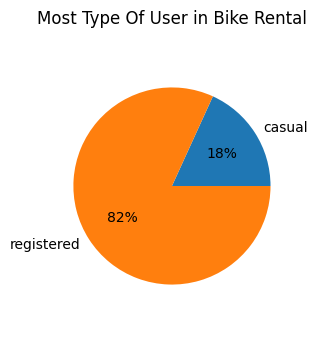

In [17]:
total_casual = hour_df.casual.sum()
total_registered = hour_df.registered.sum()

percent_of_casual = int((total_casual/(total_casual + total_registered) * 100))
percent_of_registered = int((total_registered/(total_casual + total_registered) * 100))

sizes = [percent_of_casual, percent_of_registered]
labels = ['casual', 'registered']

plt.figure(figsize=(6,4))
plt.pie(sizes, labels=labels, autopct='%1.0f%%', radius=0.8)
plt.title('Most Type Of User in Bike Rental')
plt.show()



> Based on the pie chart above, it can be seen that registered users are the most common type of user when renting bicycles. This allows registered users to include regular bicycle users.



#### 2. The influence of seasonal changes on the number of bicycle rentals

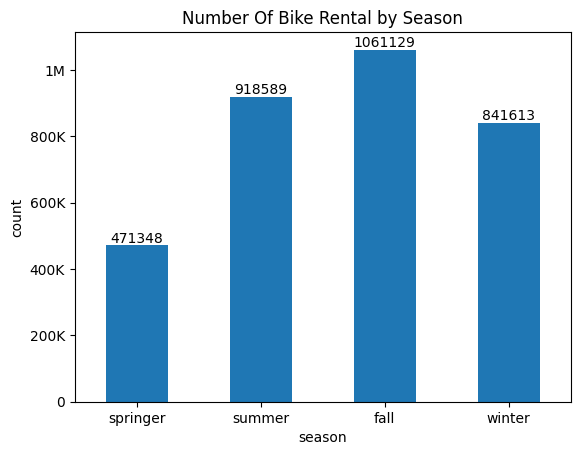

In [18]:
season_data = hour_df.groupby('season')['total_count'].sum()

import matplotlib.ticker as ticker
def format_yticks(value, _):
  if value >= 1e6:
      return f'{value / 1e6:.0f}M'
  elif value >= 1e3:
      return f'{value / 1e3:.0f}K'
  else:
      return int(value)

x = season_data.plot(kind='bar')
for i in x.patches:
  x.annotate(int(i.get_height()),(i.get_x()+0.25,i.get_height()+1),ha="center",va="bottom")
  x.tick_params(axis="both",labelsize=10)

plt.xlabel('season')
plt.ylabel('count')
plt.title('Number Of Bike Rental by Season')
x.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
plt.xticks([0,1,2,3],['springer','summer','fall','winter'], rotation=0)
plt.show()



> Based on the bar chart above, it can be seen that the highest number of bike rentals occurs in fall. This shows that fall is a suitable season for cycling.



#### 3. Trends in the number of bike rentals per hour

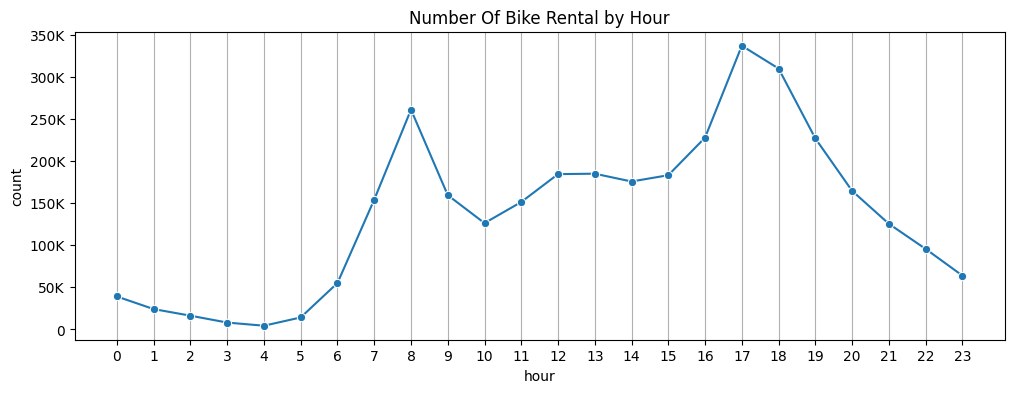

In [19]:
hour_data = hour_df.groupby('hour')['total_count'].sum()

import matplotlib.ticker as ticker
def format_yticks(value, _):
  if value >= 1e6:
      return f'{value / 1e6:.0f}M'
  elif value >= 1e3:
      return f'{value / 1e3:.0f}K'
  else:
      return int(value)

plt.figure(figsize=(12,4))
x = sns.lineplot(x='hour', y='total_count', data=pd.DataFrame(hour_data), marker='o')
plt.xlabel('hour')
plt.ylabel('count')
plt.title('Number Of Bike Rental by Hour')
x.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
x.set_xticks(range(24))
plt.grid(axis='x')
plt.show()

Based on the line diagram above, it can be seen that the highest number of bicycle rentals occurs at 8 o'clock. Then it increases from 16 to 17 o'clock.

#### 4. Trends in the number of bike rentals per month

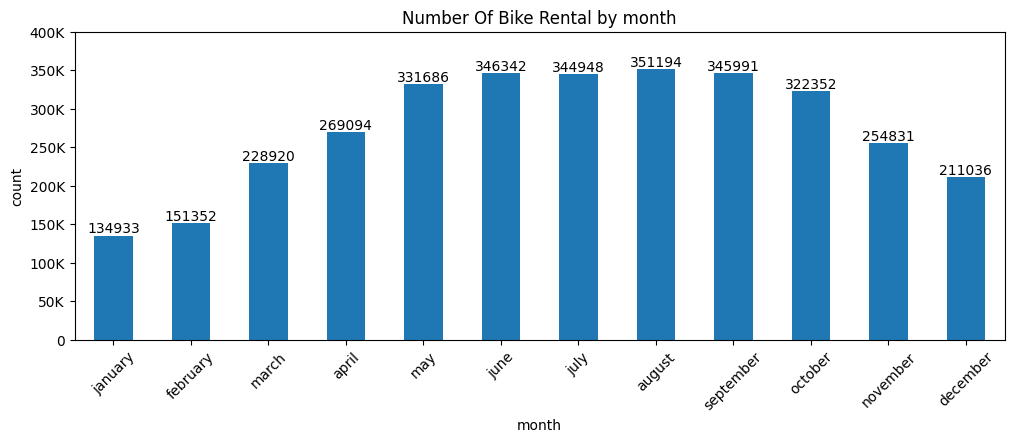

In [20]:
month_data = hour_df.groupby('month')['total_count'].sum()

import matplotlib.ticker as ticker
def format_yticks(value, _):
  if value >= 1e6:
      return f'{value / 1e6:.0f}M'
  elif value >= 1e3:
      return f'{value / 1e3:.0f}K'
  else:
      return int(value)

plt.figure(figsize=(12,4))
x = month_data.plot(kind='bar')
for i in x.patches:
  x.annotate(int(i.get_height()),(i.get_x()+0.25,i.get_height()+1),ha="center",va="bottom")
  x.tick_params(axis="both",labelsize=10)

plt.xlabel('month')
plt.ylabel('count')
plt.title('Number Of Bike Rental by month')
x.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['january','february','march','april','may','june', 'july',
                                        'august','september','october','november','december'], rotation=45)
plt.ylim(0,400000)
plt.show()

Based on the bar chart above, it can be seen that the highest number of bicycle rentals occurred in August and the lowest occurred in January.

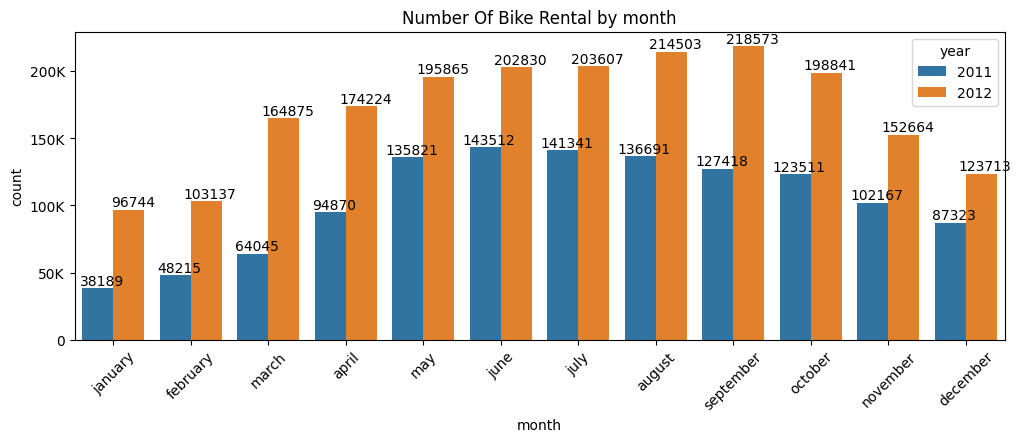

In [39]:
month_year = hour_df.groupby(['year','month'])['total_count'].sum().reset_index()
month_year['year'] = month_year['year'].map({0 : '2011', 1 : '2012'})

import matplotlib.ticker as ticker
def format_yticks(value, _):
  if value >= 1e6:
      return f'{value / 1e6:.0f}M'
  elif value >= 1e3:
      return f'{value / 1e3:.0f}K'
  else:
      return int(value)

plt.figure(figsize=(12,4))
x = sns.barplot(data=pd.DataFrame(month_year), x='month', y='total_count', hue='year')
for i in x.patches:
  x.annotate(int(i.get_height()),(i.get_x()+0.25,i.get_height()+1),ha="center",va="bottom")
  x.tick_params(axis="both",labelsize=10)

plt.xlabel('month')
plt.ylabel('count')
plt.title('Number Of Bike Rental by month')
x.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['january','february','march','april','may','june', 'july',
                                        'august','september','october','november','december'], rotation=45)
plt.show()

Based on the bar chart above, it can be seen that the number of bicycle rentals in 2011 was the highest in June and the lowest in January. Then in 2012, the highest number of bicycle rentals occurred in September and the lowest in January

#### 5. Trends in the number of bike rentals per year

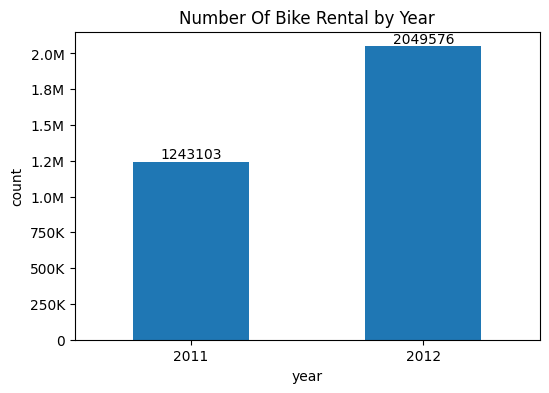

In [22]:
year_data = hour_df.groupby('year')['total_count'].sum()

import matplotlib.ticker as ticker
def format_yticks(value, _):
  if value >= 1e6:
      return f'{value / 1e6:.1f}M'
  elif value >= 1e3:
      return f'{value / 1e3:.0f}K'
  else:
      return int(value)

plt.figure(figsize=(6,4))
x = year_data.plot(kind='bar')
for i in x.patches:
  x.annotate(int(i.get_height()),(i.get_x()+0.25,i.get_height()+1),ha="center",va="bottom")
  x.tick_params(axis="both",labelsize=10)

plt.xlabel('year')
plt.ylabel('count')
plt.title('Number Of Bike Rental by Year')
x.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
plt.xticks([0,1],['2011','2012'], rotation=0)
plt.show()

The bar chart above shows that the highest number of bicycle rentals occurred in 2012.

#### 6. Relation between season and month on the number of bike rentals

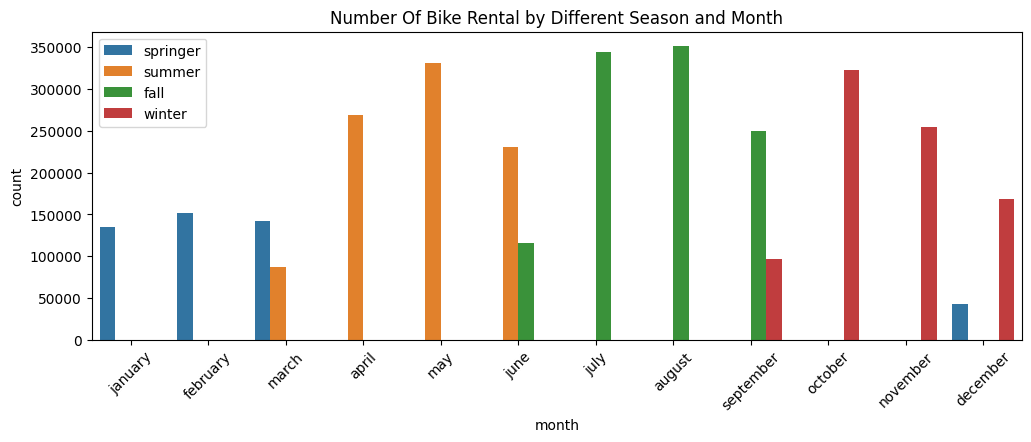

In [42]:
month_season = hour_df.groupby(['month','season'])['total_count'].sum().reset_index()
month_season = month_season[month_season != 0]
month_season['season'] = month_season['season'].map({1 : 'springer', 2 : 'summer', 3 : 'fall', 4 : 'winter'})

plt.figure(figsize=(12,4))
x = sns.barplot(x='month', y='total_count', data=pd.DataFrame(month_season), hue='season')
plt.xlabel('month')
plt.ylabel('count')
plt.title('Number Of Bike Rental by Different Season and Month')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['january','february','march','april','may','june', 'july',
                                        'august','september','october','november','december'], rotation=45)

plt.legend(loc='upper left')
plt.show()

Based on the diagram above, it can be seen that the highest number of bike rentals occurs in fall, where fall occurs between June and September. This further confirms that fall is the most suitable season for cycling and that season is from June to September.

#### 7. Trends in the number of bike rentals by weekday

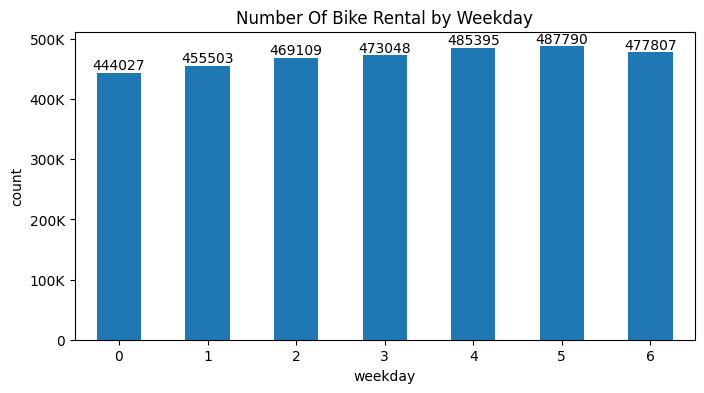

In [36]:
weekday_data = hour_df.groupby('weekday')['total_count'].sum()

import matplotlib.ticker as ticker
def format_yticks(value, _):
  if value >= 1e6:
      return f'{value / 1e6:.1f}M'
  elif value >= 1e3:
      return f'{value / 1e3:.0f}K'
  else:
      return int(value)

plt.figure(figsize=(8,4))
x = weekday_data.plot(kind='bar')
for i in x.patches:
  x.annotate(int(i.get_height()),(i.get_x()+0.25,i.get_height()+1),ha="center",va="bottom")
  x.tick_params(axis="both",labelsize=10)

plt.xlabel('weekday')
plt.ylabel('count')
plt.title('Number Of Bike Rental by Weekday')
x.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
plt.xticks(rotation=0)
plt.show()

Based on the diagram above, it can be seen that the highest number of bike rentals occurred on day 5 and the lowest occurred on day 0

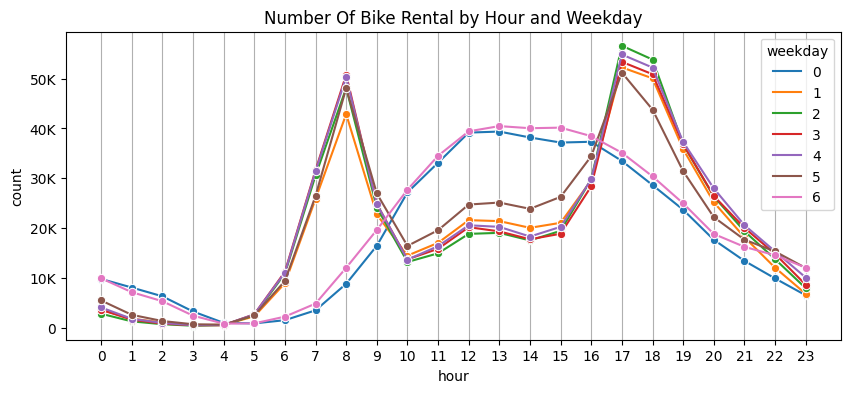

In [86]:
hour_weekday = hour_df.groupby(['hour', 'weekday'])['total_count'].sum()

import matplotlib.ticker as ticker
def format_yticks(value, _):
  if value >= 1e6:
      return f'{value / 1e6:.0f}M'
  elif value >= 1e3:
      return f'{value / 1e3:.0f}K'
  else:
      return int(value)

plt.figure(figsize=(10,4))
x = sns.lineplot(x='hour', y='total_count', data=pd.DataFrame(hour_weekday), hue='weekday', marker='o')
plt.xlabel('hour')
plt.ylabel('count')
plt.title('Number Of Bike Rental by Hour and Weekday')
x.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
x.set_xticks(range(24))
plt.grid(axis='x')
plt.show()

In the diagram above it can be seen that on day 0 and day 6 there was an increase in bike rentals from 7 to 15. Meanwhile on days 1 to 5 the highest bike rentals occurred at 8 and 17. This makes it possible that the days with the code 0 and 6 are Saturday and Sunday where these days are holidays. while days 1 to 5 are Monday to Friday where these days are working days

#### 8. Total bike rentals on holiday and workingday

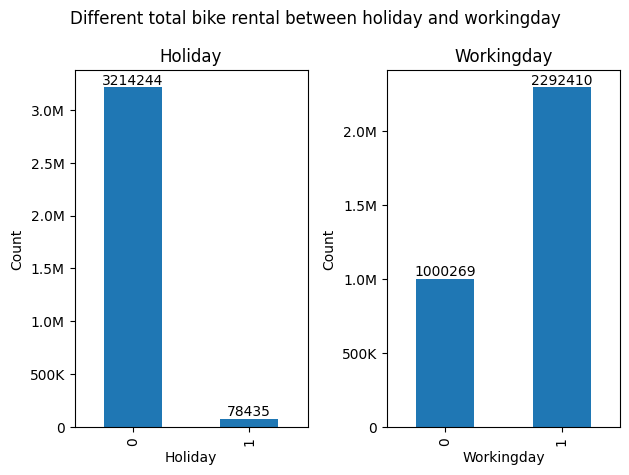

In [60]:
holiday_data = hour_df.groupby('holiday')['total_count'].sum()
workingday_data = hour_df.groupby('workingday')['total_count'].sum()

def format_yticks(value, _):
  if value >= 1e6:
      return f'{value / 1e6:.1f}M'
  elif value >= 1e3:
      return f'{value / 1e3:.0f}K'
  else:
      return int(value)

fig, (ax1, ax2) = plt.subplots(1,2)
plt.suptitle('Different total bike rental between holiday and workingday')
ax1 = holiday_data.plot(kind='bar', ax=ax1)
ax1.set_xlabel('Holiday')
ax1.set_ylabel('Count')
ax1.set_title('Holiday')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
for i in ax1.patches:
  ax1.annotate(int(i.get_height()),(i.get_x()+0.25,i.get_height()+1),ha="center",va="bottom")
  ax1.tick_params(axis="both",labelsize=10)

ax2 = workingday_data.plot(kind='bar', ax=ax2)
ax2.set_xlabel('Workingday')
ax2.set_ylabel('Count')
ax2.set_title('Workingday')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
for i in ax2.patches:
  ax2.annotate(int(i.get_height()),(i.get_x()+0.25,i.get_height()+1),ha="center",va="bottom")
  ax2.tick_params(axis="both",labelsize=10)

plt.tight_layout()
plt.show()

Based on the diagram above, it can be seen that most bike rentals occur on weekdays. This allows users to use bikes as a means of transportation to get to work.

#### 9. Total of bike rental by weather situation

<Figure size 800x400 with 0 Axes>

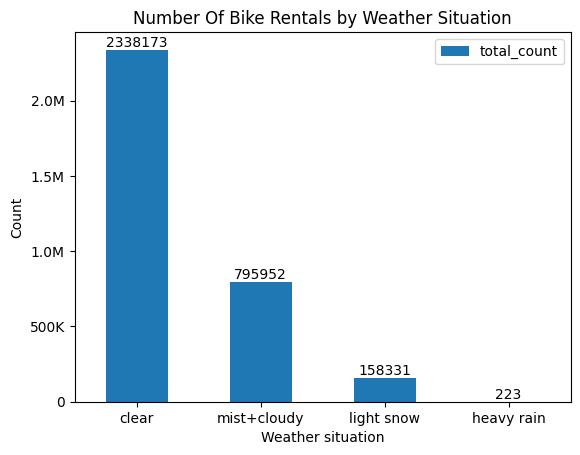

In [67]:
weathersit_data = hour_df.groupby('weathersit')['total_count'].sum().reset_index()

def format_yticks(value, _):
  if value >= 1e6:
      return f'{value / 1e6:.1f}M'
  elif value >= 1e3:
      return f'{value / 1e3:.0f}K'
  else:
      return int(value)

plt.figure(figsize=(8,4))
ax1 = weathersit_data.plot(kind='bar')
plt.xlabel('Weather situation')
plt.ylabel('Count')
plt.title('Number Of Bike Rentals by Weather Situation')
plt.xticks([0,1,2,3],['clear','mist+cloudy','light snow','heavy rain'], rotation=0)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
for i in ax1.patches:
  ax1.annotate(int(i.get_height()),(i.get_x()+0.25,i.get_height()+1),ha="center",va="bottom")
  ax1.tick_params(axis="both",labelsize=10)

plt.show()

Based on the diagram above, it can be seen that the highest bike rentals occur when the weather is sunny. This shows that sunny weather conditions are the best weather conditions for cycling.

#### 10. Distribution of temperature, humidity and wind speed in each season

In [87]:
hour_df.groupby('season').agg({
    'temperature' : ['mean', 'median', 'max', 'min'],
    'humidity' : ['mean', 'median', 'max', 'min'],
    'windspeed' : ['mean', 'median', 'max', 'min']
})

temperature                        humidity                      \
              mean median    max    min       mean median    max   min   
season                                                                   
1        12.265012  11.48  29.52   0.82  58.134842   56.0  100.0   0.0   
2        22.331191  22.96  38.54   6.56  62.702200   64.0  100.0  16.0   
3        28.962816  28.70  41.00  15.58  63.316726   65.0  100.0  16.0   
4        17.348658  17.22  31.16   5.74  66.712429   66.0  100.0  16.0   

        windspeed                    
             mean median   max  min  
season                               
1       14.411834   13.0  54.0  0.0  
2       13.628260   13.0  48.0  0.0  
3       11.496441   11.0  57.0  0.0  
4       11.444471   11.0  43.0  0.0

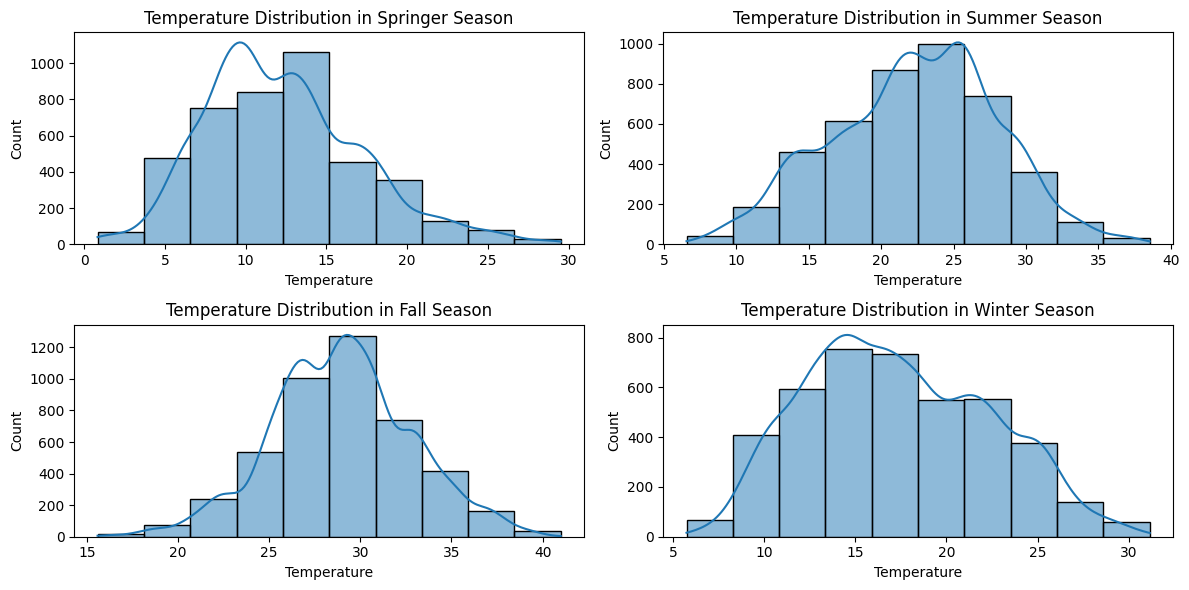

In [77]:
springer_data = hour_df[hour_df['season'] == 1]
summer_data = hour_df[hour_df['season'] == 2]
fall_data = hour_df[hour_df['season'] == 3]
winter_data = hour_df[hour_df['season'] == 4]

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(12,6))
ax1 = sns.histplot(data=springer_data, x='temperature', kde=True, bins=10, ax=ax1)
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Count')
ax1.set_title('Temperature Distribution in Springer Season')

ax2 = sns.histplot(data=summer_data, x='temperature', kde=True, bins=10, ax=ax2)
ax2.set_xlabel('Temperature')
ax2.set_ylabel('Count')
ax2.set_title('Temperature Distribution in Summer Season')

ax3 = sns.histplot(data=fall_data, x='temperature', kde=True, bins=10, ax=ax3)
ax3.set_xlabel('Temperature')
ax3.set_ylabel('Count')
ax3.set_title('Temperature Distribution in Fall Season')

ax4 = sns.histplot(data=winter_data, x='temperature', kde=True, bins=10, ax=ax4)
ax4.set_xlabel('Temperature')
ax4.set_ylabel('Count')
ax4.set_title('Temperature Distribution in Winter Season')

plt.tight_layout()
plt.show()


1. The highest number of bike rentals during the spring season occurs at temperatures of 5-15 degrees Celsius
2. The highest number of bike rentals in the summer season occurs at temperatures of 20-30 degrees Celsius
3. The highest number of bike rentals in the fall season occurs at temperatures of 25-35 degrees Celsius
4. The highest number of bike rentals in the winter season occurs at temperatures of 10-20 degrees Celsius

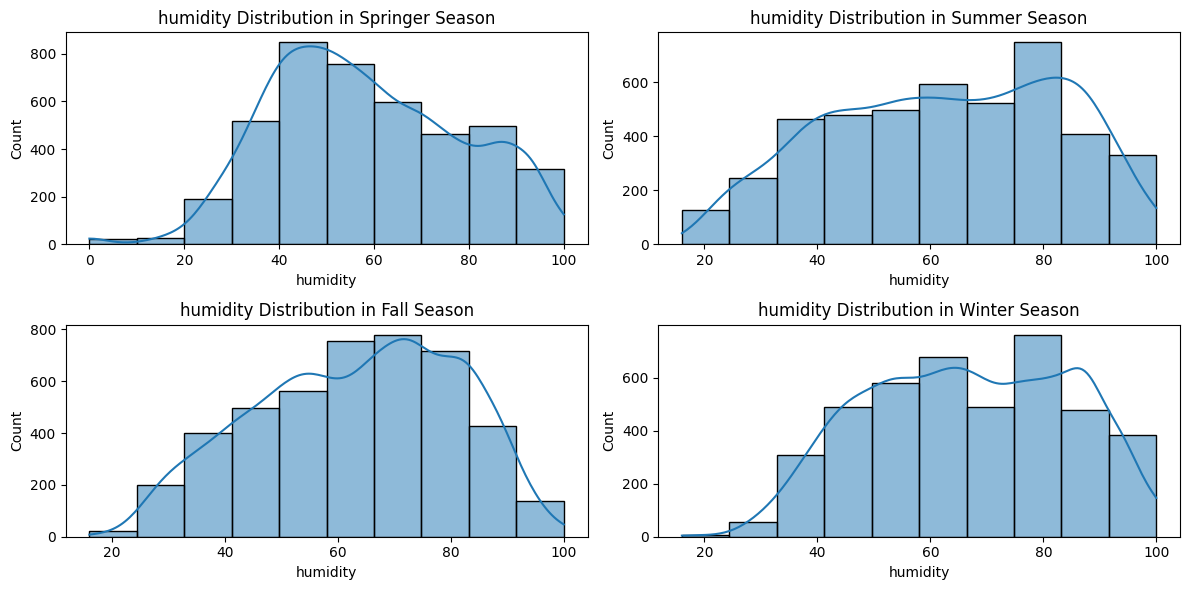

In [78]:
springer_hum_data = hour_df[hour_df['season'] == 1]
summer_hum_data = hour_df[hour_df['season'] == 2]
fall_hum_data = hour_df[hour_df['season'] == 3]
winter_hum_data = hour_df[hour_df['season'] == 4]

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(12,6))
ax1 = sns.histplot(data=springer_hum_data, x='humidity', kde=True, bins=10, ax=ax1)
ax1.set_xlabel('humidity')
ax1.set_ylabel('Count')
ax1.set_title('humidity Distribution in Springer Season')

ax2 = sns.histplot(data=summer_hum_data, x='humidity', kde=True, bins=10, ax=ax2)
ax2.set_xlabel('humidity')
ax2.set_ylabel('Count')
ax2.set_title('humidity Distribution in Summer Season')

ax3 = sns.histplot(data=fall_hum_data, x='humidity', kde=True, bins=10, ax=ax3)
ax3.set_xlabel('humidity')
ax3.set_ylabel('Count')
ax3.set_title('humidity Distribution in Fall Season')

ax4 = sns.histplot(data=winter_hum_data, x='humidity', kde=True, bins=10, ax=ax4)
ax4.set_xlabel('humidity')
ax4.set_ylabel('Count')
ax4.set_title('humidity Distribution in Winter Season')

plt.tight_layout()
plt.show()

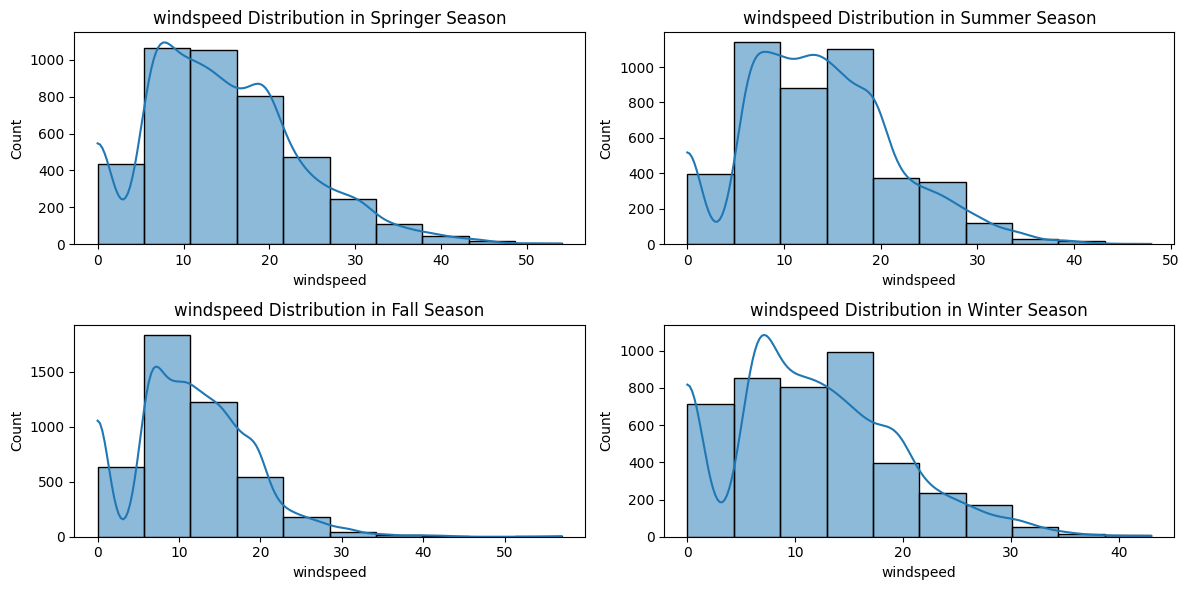

In [79]:
springer_windspeed = hour_df[hour_df['season'] == 1]
summer_windspeed = hour_df[hour_df['season'] == 2]
fall_windspeed = hour_df[hour_df['season'] == 3]
winter_windspeed = hour_df[hour_df['season'] == 4]

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(12,6))
ax1 = sns.histplot(data=springer_windspeed, x='windspeed', kde=True, bins=10, ax=ax1)
ax1.set_xlabel('windspeed')
ax1.set_ylabel('Count')
ax1.set_title('windspeed Distribution in Springer Season')

ax2 = sns.histplot(data=summer_windspeed, x='windspeed', kde=True, bins=10, ax=ax2)
ax2.set_xlabel('windspeed')
ax2.set_ylabel('Count')
ax2.set_title('windspeed Distribution in Summer Season')

ax3 = sns.histplot(data=fall_windspeed, x='windspeed', kde=True, bins=10, ax=ax3)
ax3.set_xlabel('windspeed')
ax3.set_ylabel('Count')
ax3.set_title('windspeed Distribution in Fall Season')

ax4 = sns.histplot(data=winter_windspeed, x='windspeed', kde=True, bins=10, ax=ax4)
ax4.set_xlabel('windspeed')
ax4.set_ylabel('Count')
ax4.set_title('windspeed Distribution in Winter Season')

plt.tight_layout()
plt.show()

#### 11. Correlation map

<ipython-input-85-226f3e20dcb6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = hour_df.corr()


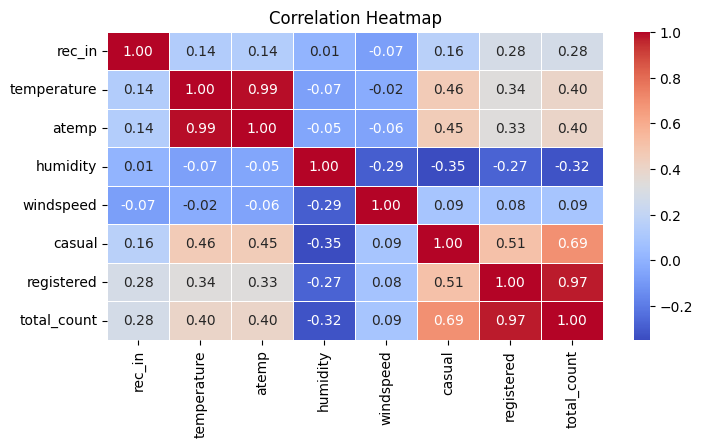

In [85]:
correlation_matrix = hour_df.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()